<a href="https://colab.research.google.com/github/vitorlooo/ProjetoII-AnaliseDados/blob/main/ProjetoIIMusicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto II Análise de Dados**


# **Base 05 - Músicas Mais Tocadas**

**Descrição geral:**
Base com dados sobre as músicas mais populares em 2024, abrangendo plataformas como Spotify, YouTube, TikTok, entre outras.

**1. Introdução:**
Este trabalho tem como objetivo aplicar os principais algoritmos de classificação e regressão
estudados em sala de aula, utilizando bases de dados reais. A proposta visa consolidar o conhecimento
técnico e metodológico em Machine Learning, por meio da implementação prática das técnicas, avaliação
dos resultados e interpretação crítica das descobertas.

### Dicionário de Variáveis

| Variável                     | Descrição                                               |
|-----------------------------|----------------------------------------------------------|
| Track                       | Nome da música                                           |
| Album Name                  | Nome do álbum                                            |
| Artist                      | Nome do artista                                          |
| Release Date                | Data de lançamento                                       |
| ISRC                        | Código internacional da faixa                           |
| All Time Rank               | Posição da música no ranking histórico                   |
| Track Score                 | Nota da faixa (score)                                    |
| Spotify Streams             | Número de execuções no Spotify                          |
| Spotify Playlist Count      | Quantidade de playlists do Spotify                      |
| Spotify Playlist Reach      | Alcance das playlists do Spotify                        |
| Spotify Popularity          | Popularidade da música no Spotify                       |
| YouTube Views               | Visualizações no YouTube                                |
| YouTube Likes               | Curtidas no YouTube                                     |
| TikTok Posts                | Número de posts no TikTok                               |
| TikTok Likes                | Curtidas no TikTok                                      |
| TikTok Views                | Visualizações no TikTok                                 |
| YouTube Playlist Reach      | Alcance das playlists no YouTube                        |
| Apple Music Playlist Count  | Quantidade de playlists na Apple Music                  |
| AirPlay Spins               | Execuções em rádios AirPlay                             |
| SiriusXM Spins              | Execuções na SiriusXM                                   |
| Deezer Playlist Count       | Quantidade de playlists no Deezer                       |
| Deezer Playlist Reach       | Alcance das playlists no Deezer                         |
| Amazon Playlist Count       | Quantidade de playlists na Amazon Music                 |
| Pandora Streams             | Execuções na Pandora                                    |
| Pandora Track Stations      | Número de estações da Pandora com a faixa               |
| Soundcloud Streams          | Execuções no SoundCloud                                 |
| Shazam Counts               | Quantidade de identificações via Shazam                 |
| TIDAL Popularity            | Popularidade no TIDAL                                   |
| Explicit Track              | Contém conteúdo explícito (Sim/Não)                     |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_wine, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, mean_squared_error
)
from sklearn.linear_model import (
    LogisticRegression, LinearRegression
)
from sklearn.tree import (
    DecisionTreeClassifier, DecisionTreeRegressor
)
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor
)
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/05musicas.csv", sep=',', encoding='latin1')


Mounted at /content/drive


#Limpeza dos dados


In [4]:
# A função 'df.isnull' é utilizada para identificar presença de dados nulos em um dataframe

tabela_nulos = df.isnull().sum().reset_index()

# Renomear nome das colunas no dataframe

tabela_nulos.columns = ['Variável', 'Qtd_Nulos']

# Exibir a tabela ordenada pela quantidade de nulos
tabela_nulos = tabela_nulos.sort_values(by='Qtd_Nulos', ascending=False)

# Mostrar a tabela
print(tabela_nulos)

                      Variável  Qtd_Nulos
27            TIDAL Popularity       4600
25          Soundcloud Streams       3333
19              SiriusXM Spins       2123
24      Pandora Track Stations       1268
13                TikTok Posts       1173
23             Pandora Streams       1106
22       Amazon Playlist Count       1055
16      YouTube Playlist Reach       1009
15                TikTok Views        981
14                TikTok Likes        980
21       Deezer Playlist Reach        928
20       Deezer Playlist Count        921
10          Spotify Popularity        804
26               Shazam Counts        577
17  Apple Music Playlist Count        561
18               AirPlay Spins        498
12               YouTube Likes        315
11               YouTube Views        308
7              Spotify Streams        113
9       Spotify Playlist Reach         72
8       Spotify Playlist Count         70
2                       Artist          5
5                All Time Rank    

In [5]:
# Remoção de uma coluna 100% nulas, sem informações útils
df.drop(columns=['TIDAL Popularity'], inplace = True)

In [7]:
# O método '.filna' serve para substituir valores nulos ou ausentes em um DataFrame

df['Artist'] = df['Artist'].fillna('Desconhecido')

In [8]:
# 'pd.to_datetime' é uma função da biblioteca Pandas em Python que converte um tipo de valor para o tipo de dado 'datetime'

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

In [9]:
# 'df.drop_duplicates(inplace=True)'é uma função que remove linhas duplicadas de um DataFrame

linhas_antes = df.shape[0]
df.drop_duplicates(inplace=True)
linhas_removidas = linhas_antes - df.shape[0]

if linhas_removidas > 0:
    print(f"{linhas_removidas} linhas duplicadas foram removidas.")
else:
    print("Nenhuma linha duplicada foi encontrada ou removida.")

2 linhas duplicadas foram removidas.


In [10]:
# Lista de colunas que precisam ser convertidas para numérico
cols_to_convert_to_numeric = [
    'All Time Rank',
    'Spotify Streams',
    'Spotify Playlist Count',
    'Spotify Playlist Reach',
    'YouTube Views',
    'YouTube Likes',
    'TikTok Posts',
    'TikTok Likes',
    'TikTok Views',
    'YouTube Playlist Reach',
    'SiriusXM Spins',
    'AirPlay Spins',
    'Deezer Playlist Reach',
    'Amazon Playlist Count',
    'Pandora Streams',
    'Pandora Track Stations',
    'Shazam Counts',
    'Soundcloud Streams'
]

for col in cols_to_convert_to_numeric:
    df[col] = df[col].astype(str).str.replace('∅', '', regex=False).str.replace(',', '', regex=False).str.strip()

    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4598 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   ISRC                        4598 non-null   object        
 5   All Time Rank               4598 non-null   int64         
 6   Track Score                 4598 non-null   float64       
 7   Spotify Streams             4485 non-null   float64       
 8   Spotify Playlist Count      4528 non-null   float64       
 9   Spotify Playlist Reach      4526 non-null   float64       
 10  Spotify Popularity          3794 non-null   float64       
 11  YouTube Views               4290 non-null   float64       
 1

In [11]:
# Verifica se há algum valor faltando. Se encontrar valores ausentes, preenche com a mediana da coluna

colunas_para_mediana = [
    'Soundcloud Streams', 'SiriusXM Spins', 'Pandora Track Stations',
    'TikTok Posts', 'Pandora Streams', 'Amazon Playlist Count',
    'YouTube Playlist Reach', 'TikTok Views', 'TikTok Likes',
    'Deezer Playlist Reach', 'Deezer Playlist Count',
    'Spotify Popularity', 'Shazam Counts', 'Apple Music Playlist Count',
    'AirPlay Spins', 'YouTube Likes', 'YouTube Views',
    'Spotify Streams', 'Spotify Playlist Reach', 'Spotify Playlist Count'
]

for col in colunas_para_mediana:
    if col in df.columns and df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-11-2649392974.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4598 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   ISRC                        4598 non-null   object        
 5   All Time Rank               4598 non-null   int64         
 6   Track Score                 4598 non-null   float64       
 7   Spotify Streams             4598 non-null   float64       
 8   Spotify Playlist Count      4598 non-null   float64       
 9   Spotify Playlist Reach      4598 non-null   float64       
 10  Spotify Popularity          4598 non-null   float64       
 11  YouTube Views               4598 non-null   float64       
 1

#2. Algoritmos de Classificação Comuns

In [85]:
# 1º Para que os algoritmos de classificação pudessem operar sobre a popularidade das músicas, eu transformei a variável numérica 'Spotify Popularity' em uma variável categórica.
# 2º Dividi os dados em três faixas com base nos tercis (33% e 66%), criando as classes: Baixa, Média e Alta popularidade.
# 3º Depois, essas categorias foram convertidas para números (0, 1 e 2), já que os algoritmos de Machine Learning trabalham apenas com dados numéricos.
# 4º Por fim, foi criada uma lista chamada class_names_classification para facilitar a leitura dos resultados, como nas matrizes de confusão.

q1_popularity = df['Spotify Popularity'].quantile(0.33)
q2_popularity = df['Spotify Popularity'].quantile(0.66)

def categorize_popularity(popularity):
    if popularity <= q1_popularity:
        return 'Baixa'
    elif popularity <= q2_popularity:
        return 'Média'
    else:
        return 'Alta'

df['Popularity_Category'] = df['Spotify Popularity'].apply(categorize_popularity)
popularity_mapping = {'Baixa': 0, 'Média': 1, 'Alta': 2}
y_class = df['Popularity_Category'].map(popularity_mapping)
class_names_classification = ['Baixa', 'Média', 'Alta']

In [86]:
# Remoção das colunas não numéricas 'Track', 'Album Name', 'Artist', 'Release Date' e 'ISRC'.
# Remoção das colunas que indicam diretamente a popularidade da música e a váriavel utilizada na regressão, como ‘Spotify Popularity’, ‘Popularity_Category’ e ‘Spotify Streams_log’.

colunas_para_excluir_classificacao = [
    'Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
    'Spotify Popularity',
    'Popularity_Category',
    'Spotify Streams_log',
]
X_class = df.drop(columns=colunas_para_excluir_classificacao, errors='ignore').select_dtypes(include=np.number)


In [87]:
scaler_class = StandardScaler()
X_scaled_class = scaler_class.fit_transform(X_class)

#Separando Treino e Testes

In [88]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_scaled_class, y_class, test_size=0.3, random_state=42
)

#Algoritmos de Classificação


In [89]:
modelos_classificacao = {
    "Regressão Logística": LogisticRegression(max_iter=200, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

#Avaliação por modelo



Avaliação dos Modelos de Classificação

Regressão Logística
Acurácia : 0.60
Precisão : 0.60
Recall   : 0.59
F1-Score : 0.59


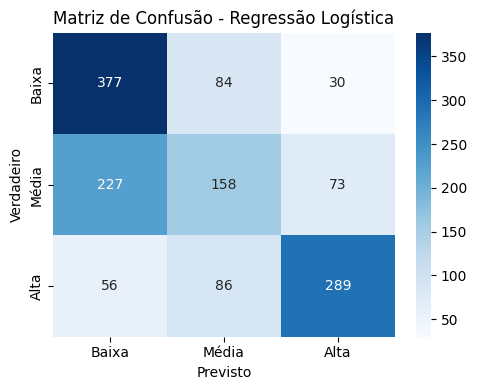


Árvore de Decisão
Acurácia : 0.59
Precisão : 0.59
Recall   : 0.59
F1-Score : 0.59


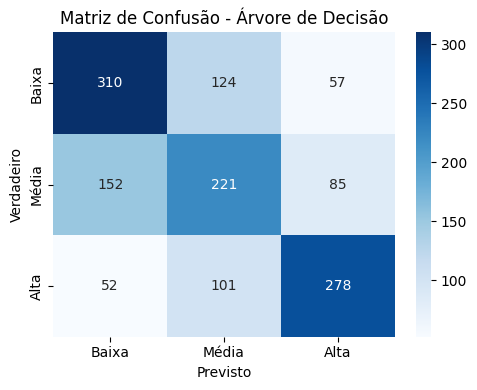


Random Forest
Acurácia : 0.67
Precisão : 0.67
Recall   : 0.67
F1-Score : 0.67


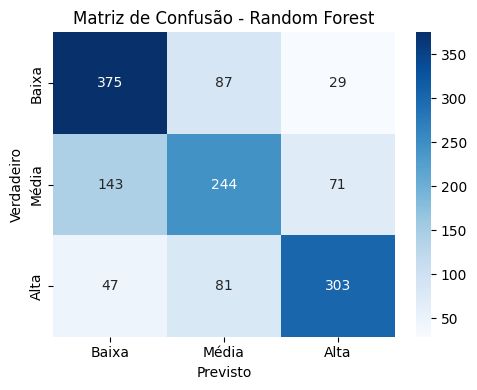


SVM
Acurácia : 0.64
Precisão : 0.65
Recall   : 0.64
F1-Score : 0.64


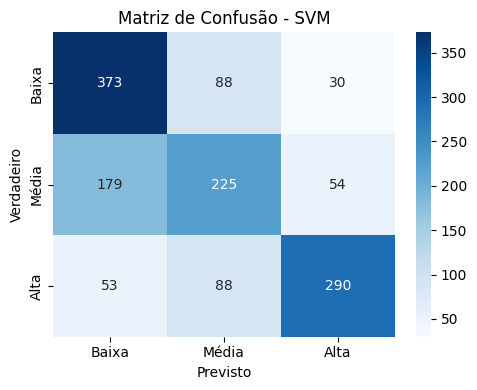


K-NN
Acurácia : 0.61
Precisão : 0.62
Recall   : 0.61
F1-Score : 0.61


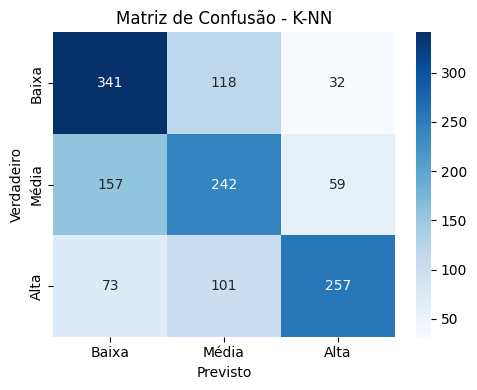

In [90]:
print("\nAvaliação dos Modelos de Classificação")
for nome, modelo in modelos_classificacao.items():
    print(f"\n{nome}")
    modelo.fit(X_train_class, y_train_class)
    y_pred_class = modelo.predict(X_test_class)

    acc = accuracy_score(y_test_class, y_pred_class)
    prec = precision_score(y_test_class, y_pred_class, average='macro', zero_division=0)
    rec = recall_score(y_test_class, y_pred_class, average='macro', zero_division=0)
    f1 = f1_score(y_test_class, y_pred_class, average='macro', zero_division=0)
    cm = confusion_matrix(y_test_class, y_pred_class)

    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names_classification, yticklabels=class_names_classification)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

#Análise Classificação

Na tarefa de classificar as músicas em categorias de popularidade ('Baixa', 'Média', 'Alta'), os algoritmos de Machine Learning demonstraram desempenho variado. O Random Forest destacou-se como o modelo de melhor performance, atingindo a marca de 0.67 em todas as métricas avaliadas (Acurácia, Precisão, Recall, F1-Score). Sua matriz de confusão revelou uma capacidade superior de identificar corretamente as 4 classes, incluindo a categoria 'Média', que representou um desafio maior para os demais modelos como SVM.


#Defesa da Escolha dos Hiperparâmetros (Classificação)

Ao configurar os modelos de classificação, defini os hiperparâmetros com base nos fundamentos da aula e na lógica operacional de cada algoritmo para balancear ajuste e generalização:

- Para o K-NN, selecionei k=5 após testes exploratórios, buscando o melhor equilíbrio.

- No SVM (SVC), empreguei o kernel='rbf' para relações não lineares e mantive o C no padrão (1.0).

- Para o Random Forest, fixei n_estimators=100 para robustez e viabilidade computacional,

- Enquanto a Árvore de Decisão utilizou parâmetros padrão para explorar a complexidade dos dados.

- Na Regressão Logística, ajustei max_iter=200 e adicionei random_state=42 para garantir convergência e reprodutibilidade, seguindo as práticas comuns.


#Análises Classificação

#3. Algoritmos de Regressão


In [91]:
# A variável "Spotify Streams" tinha valores muito extremos, dificultando o treinamento dos modelos de regressão, resultando em RMSEs gigantes, chegando a 559.8 milhões.
# Então foi utilizada a transformação logarítmica (np.log1p), para comprimir a escala, tornando a distribuição mais simétrica e menos suscetível à influência de outliers.
# Permitiu que os modelos de regressão aprendessem os padrões de forma mais eficaz e gerassem previsões mais precisas, com RMSEs caindo para valores próximos de zero na escala logarítmica.

df['Spotify Streams_log'] = np.log1p(df['Spotify Streams'])
y_reg = df['Spotify Streams_log']

colunas_para_excluir_regressao = [
    'Track',
    'Album Name',
    'Artist',
    'Release Date',
    'ISRC',
    'Spotify Streams'
]

X_reg = df.drop(columns=colunas_para_excluir_regressao, errors='ignore').select_dtypes(include=np.number)

#Separando Treino e Teste




In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [93]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

#Regressão Linear

In [94]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

pred_lr = modelo_lr.predict(X_test)
avaliar_modelo(y_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 0.00


#Árvore de Regressão


In [81]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

pred_tree = modelo_tree.predict(X_test)
avaliar_modelo(y_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 0.03


#Random Forest Regressor


In [82]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

pred_rf = modelo_rf.predict(X_test)
avaliar_modelo(y_test, pred_rf, "Random Forest")

Random Forest - RMSE: 0.01


#Support Vector Regressor (SVR)

In [83]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
modelo_svr.fit(X_train, y_train)

pred_svr = modelo_svr.predict(X_test)
avaliar_modelo(y_test, pred_svr, "SVR")

SVR - RMSE: 0.40


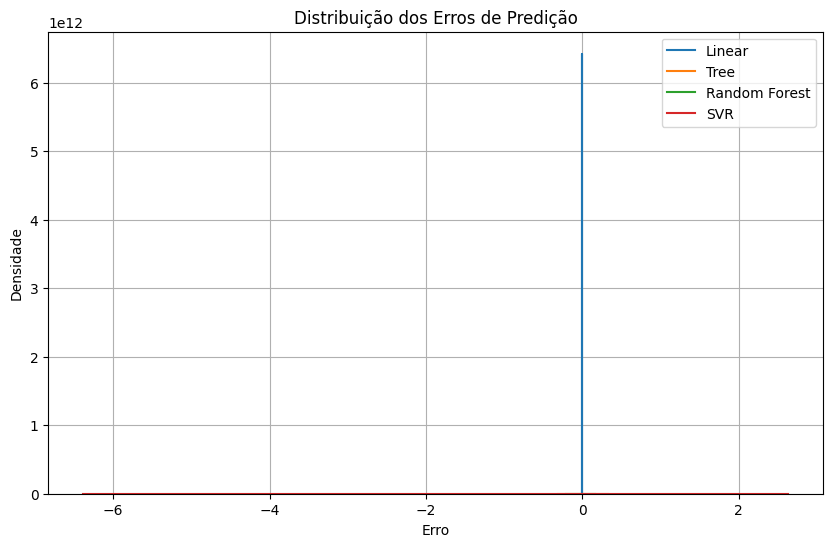

In [84]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test - pred_lr, label="Linear")
sns.kdeplot(y_test - pred_tree, label="Tree")
sns.kdeplot(y_test - pred_rf, label="Random Forest")
sns.kdeplot(y_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

#Análise Regressão

O gráfico visualmente confirma os resultados numéricos. As curvas para Regressão Linear, Árvore de Regressão e Random Forest são extremamente concentradas em zero, indicando que a vasta maioria de suas previsões são quase perfeitas. A linha azul da Regressão Linear é particularmente alta, refletindo seu RMSE de 0.00. A linha vermelha do SVR, embora também centrada em zero, é visivelmente mais "achatada" e espalhada, o que corresponde ao seu RMSE de 0.40 (maior dispersão de erros).

#Conclusão Geral

Este projeto aplicou algoritmos de Machine Learning para analisar as músicas mais tocadas de 2024, focando em tarefas de previsão (regressão) e categorização (classificação). Começamos com uma limpeza cuidadosa dos dados para garantir sua qualidade.

Na regressão, que buscava prever o número de streams no Spotify, descobrimos que transformar os dados com logaritmo foi essencial. Essa transformação fez com que modelos como a Regressão Linear e o Random Forest alcançassem uma precisão quase perfeita, com erros muito baixos, o que não seria possível sem essa etapa.


Na classificação, nosso objetivo foi categorizar as músicas como de popularidade 'Baixa', 'Média' ou 'Alta'. Aqui, o modelo Random Forest se destacou, acertando a classificação em 67% das vezes e lidando melhor com as diferentes categorias, incluindo a 'Média', que se mostrou mais desafiadora. O projeto demonstrou que, com o preparo certo dos dados e a escolha adequada dos algoritmos, podemos extrair informações valiosas sobre a popularidade musical e construir ferramentas preditivas e de classificação eficazes.

